# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [4]:
# import the final data set
df = pd.read_csv('final.csv')
print(df.shape)
df.head()

(1864, 11)


,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,property_type,popular,recession
0,295850,234,81,1,1,584,0,0.0,Condo,0,1
1,216500,169,51,1,1,612,0,1.0,Condo,0,0
2,279900,216,74,1,1,615,0,0.0,Condo,0,1
3,379900,265,92,1,1,618,33541,0.0,Condo,0,0
4,340000,88,30,1,1,634,0,0.0,Condo,0,0


## One hot encoding
Converting categorical variables to flag variables

In [6]:
df['property_type'].unique()

array(['Condo', 'Bunglow'], dtype=object)

In [7]:
df = pd.get_dummies(df, columns = ['property_type']) #drop_first

In [8]:
df.head()

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_type_Bunglow,property_type_Condo
0,295850,234,81,1,1,584,0,0.0,0,1,0,1
1,216500,169,51,1,1,612,0,1.0,0,0,0,1
2,279900,216,74,1,1,615,0,0.0,0,1,0,1
3,379900,265,92,1,1,618,33541,0.0,0,0,0,1
4,340000,88,30,1,1,634,0,0.0,0,0,0,1


In [ ]:
#df.describe()

**Before you begin modeling, you should split the data in train and test subsets.**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [10]:
# seperate the target variable
y = df.price

# seperate the features
x = df.drop('price', axis=1)

# df.iloc[:,1:3]

In [11]:
# import module for train-test split
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=1234)

In [12]:
# check records in each split
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1491, 11), (373, 11), (1491,), (373,))

In [13]:
# import the model
from sklearn.linear_model import LinearRegression

# train the model
#del model
lrmodel = LinearRegression().fit(xtrain,ytrain)

In [14]:
# make prediction on train set
ytrain_pred = lrmodel.predict(xtrain)

In [15]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, ytrain)
train_mae

95279.12811017079

In [16]:
## make predictions using the x_test values
ytest_pred = lrmodel.predict(xtest)

In [18]:
# evaluate the model
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

95461.55710534172

## Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(xtrain,ytrain)

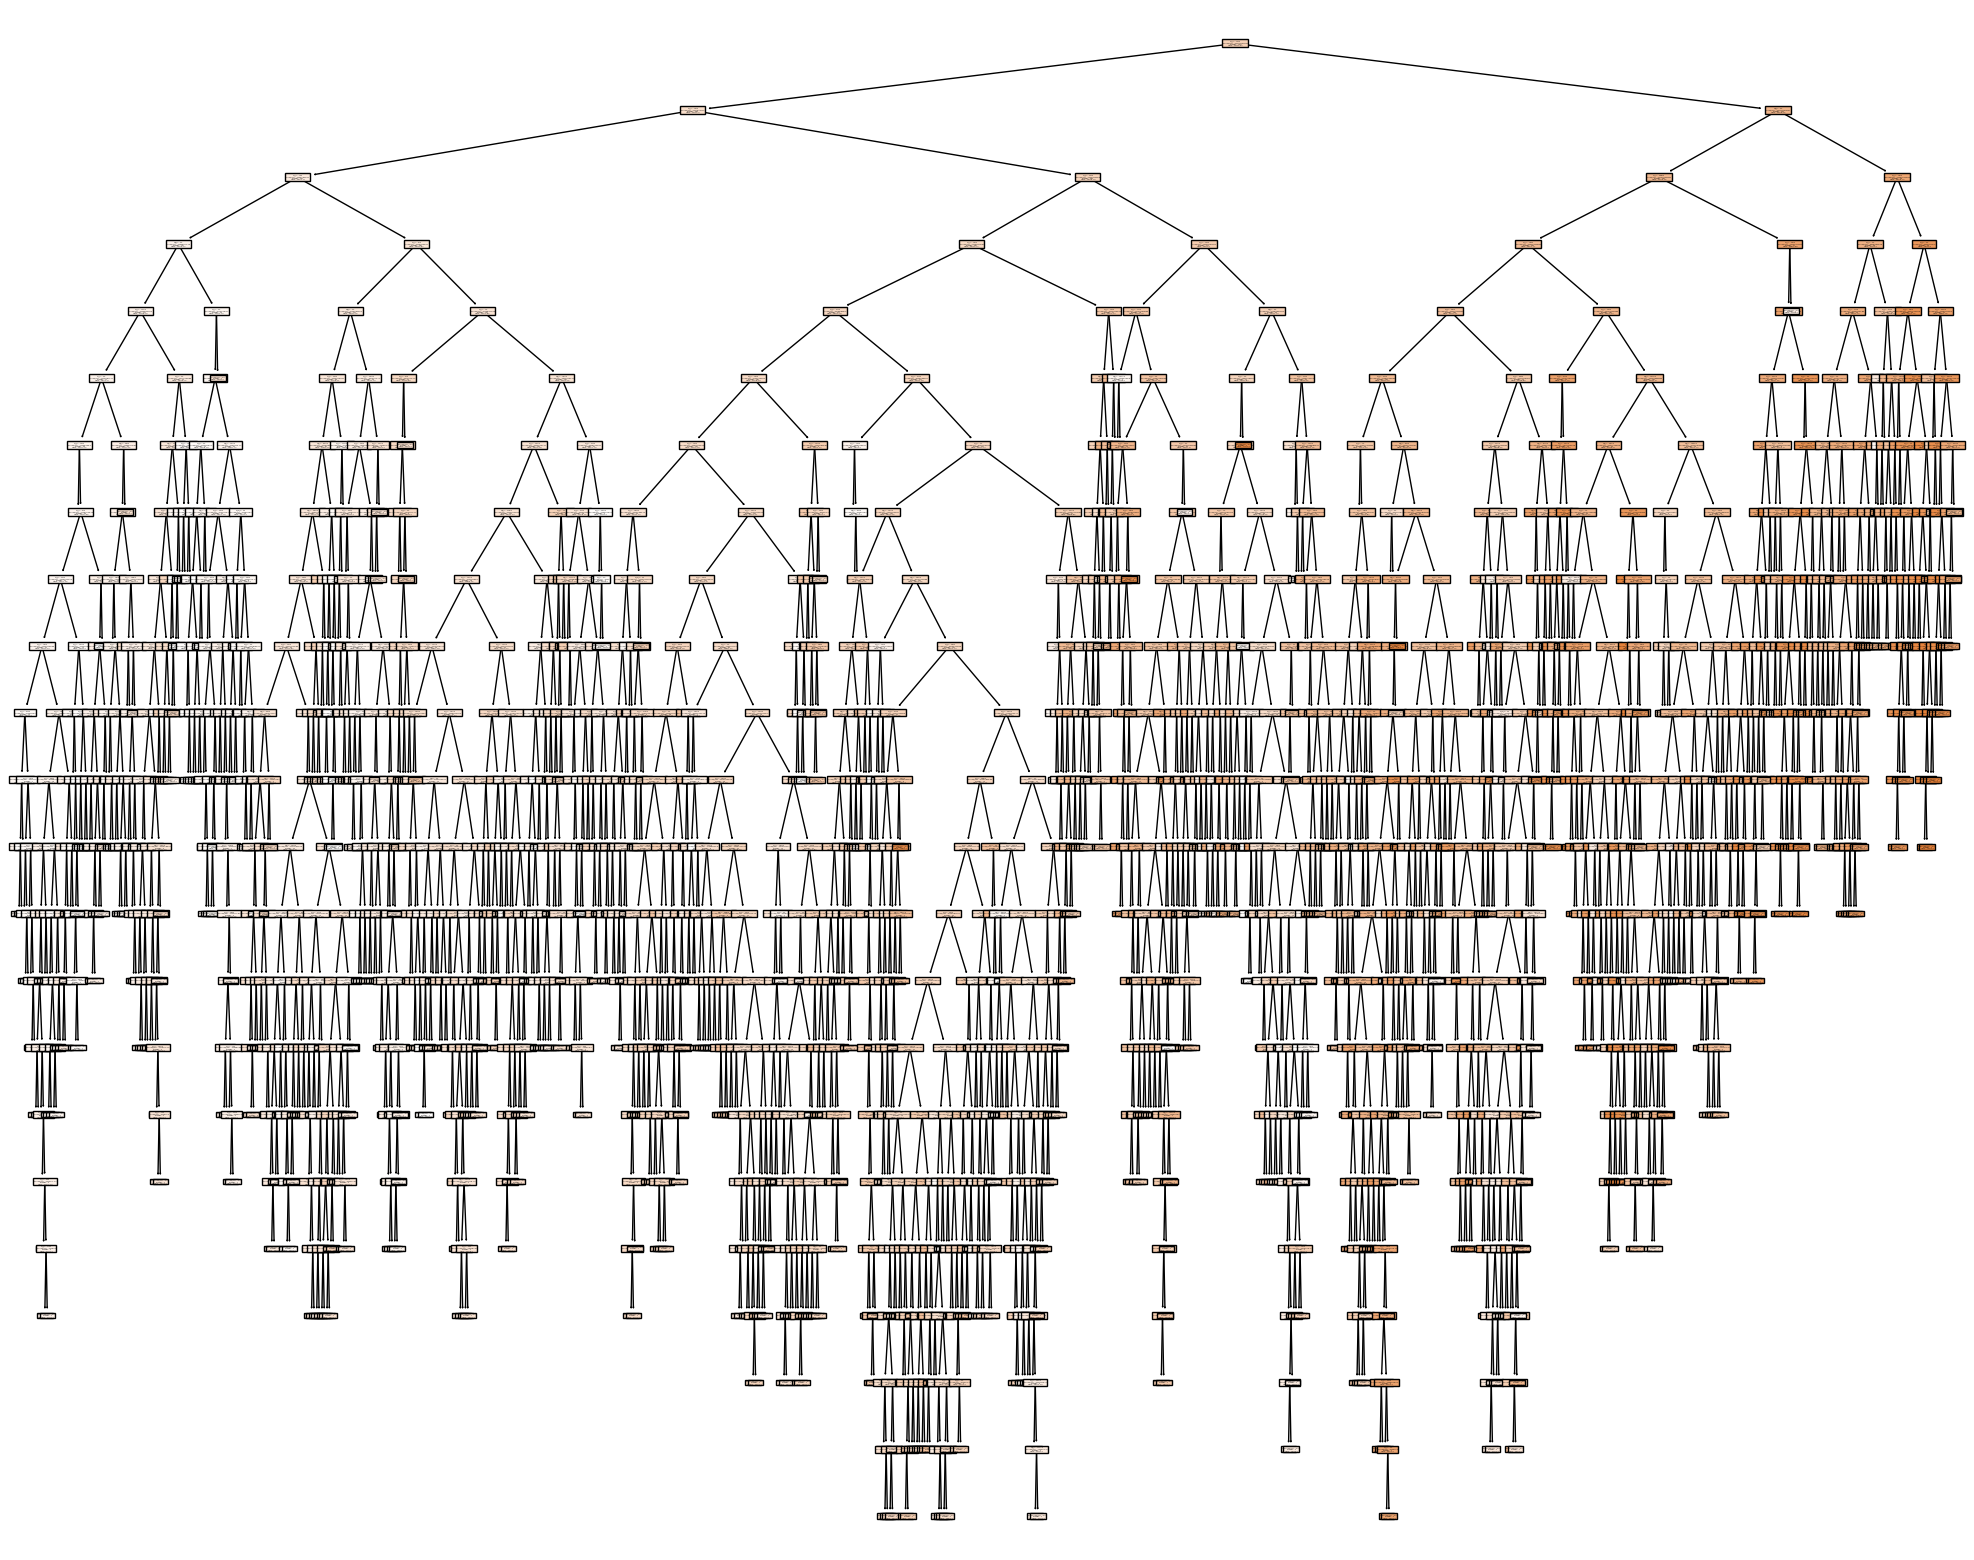

In [20]:
# plotting tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, filled=True)
plt.show()

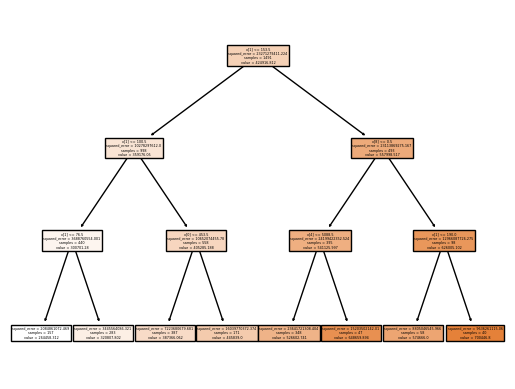

In [21]:
# Prune the tree using hyperparameters
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=30).fit(xtrain,ytrain)
from sklearn import tree
tree.plot_tree(dt, filled=True);


In [22]:
ytrain_pred = dt.predict(xtrain)
dt_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error is',dt_mae)

Train error is 79713.04691574062


In [23]:
# make predictions using the x_test values
ytest_pred = dt.predict(xtest)

# evaluate the model
test_mae = mean_absolute_error(ytest_pred, ytest)
test_mae

79903.4370574459

## Random Forest Model

In [24]:
# import Random Forest model from scikit learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,criterion='absolute_error').fit(xtrain,ytrain)
ytrain_pred = rf.predict(xtrain)
rftrain_mae = mean_absolute_error(ytrain_pred, ytrain)
print('Train error RF model is',rftrain_mae)

Train error RF model is 31307.599676391685


In [25]:
# make predictions on the x_test values
ytest_pred = rf.predict(xtest)

# evaluate the model
rftest_mae = mean_absolute_error(ytest_pred, ytest)
rftest_mae

81462.66276809652

In [26]:
df.corr()

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_type_Bunglow,property_type_Condo
price,1.000000,0.558472,0.554757,0.388032,0.399007,0.487109,0.132329,0.110148,-0.147925,-0.021925,0.322992,-0.322992
property_tax,0.558472,1.000000,0.983429,0.545222,0.508267,0.640612,0.155313,0.183795,-0.208711,-0.121014,0.449724,-0.449724
insurance,0.554757,0.983429,1.000000,0.479685,0.454513,0.569704,0.135128,0.136076,-0.173625,-0.120501,0.410435,-0.410435
beds,0.388032,0.545222,0.479685,1.000000,0.640575,0.688867,0.159538,0.413995,-0.429638,-0.070280,0.659002,-0.659002
baths,0.399007,0.508267,0.454513,0.640575,1.000000,0.669336,0.121275,0.345553,-0.197030,-0.057141,0.339769,-0.339769
sqft,0.487109,0.640612,0.569704,0.688867,0.669336,1.000000,0.238650,0.271147,-0.270512,-0.078518,0.526020,-0.526020
lot_size,0.132329,0.155313,0.135128,0.159538,0.121275,0.238650,1.000000,0.009372,-0.077096,-0.003899,0.179066,-0.179066
basement,0.110148,0.183795,0.136076,0.413995,0.345553,0.271147,0.009372,1.000000,-0.198073,-0.046525,0.254377,-0.254377
popular,-0.147925,-0.208711,-0.173625,-0.429638,-0.197030,-0.270512,-0.077096,-0.198073,1.000000,0.083349,-0.303452,0.303452
recession,-0.021925,-0.121014,-0.120501,-0.070280,-0.057141,-0.078518,-0.003899,-0.046525,0.083349,1.000000,-0.052831,0.052831


#### From the observations above, answers the following questions:

Q1. Which model gave the lowest error? - 1 point

Ans: The model who gave the lowest error is the Random Forest Model


Q2. Why was linear regression not a suitable choice for this data? - 1 point

Ans:Theres more than 2 variables, hence linear regression is not suitable.

Q3. Which are the top 5 important features in this dataset? - 1 point

Ans: Price, Property_tax, Insurance, Beds, Baths.

## Saving the Model

## Pickle:

* The pickle module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, while restoring the data is called Deserialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [27]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(lrmodel, open('RE_Model','wb'))

In [28]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model','rb'))

In [29]:
np.array(xtrain.loc[22])

array([139.,  42.,   1.,   1., 703.,   0.,   1.,   0.,   0.,   0.,   1.])

In [30]:
ytrain[22]

240000

In [31]:
df

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,popular,recession,property_type_Bunglow,property_type_Condo
0,295850,234,81,1,1,584,0,0.0,0,1,0,1
1,216500,169,51,1,1,612,0,1.0,0,0,0,1
2,279900,216,74,1,1,615,0,0.0,0,1,0,1
3,379900,265,92,1,1,618,33541,0.0,0,0,0,1
4,340000,88,30,1,1,634,0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1859,760000,881,249,5,5,7842,436035,1.0,0,0,1,0
1860,690000,1553,473,5,6,6501,23086,1.0,0,0,1,0
1861,600000,942,287,5,6,7064,217800,1.0,0,0,1,0
1862,759900,803,245,5,6,7500,8886,1.0,0,0,1,0


In [32]:
# Use the loaded pickled model to make predictions
RE_Model.predict([[139,  42,   1,   1, 703,   0,   1,  0,   0,   6,   1,  0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored